In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.5MB/s 
     |████████████████████████████████| 194kB 23.7MB/s 
     |████████████████████████████████| 1.0MB 23.7MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 40kB 7.4MB/s 
     |████████████████████████████████| 92kB 12.5MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 2.6MB 22.2MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *


In [ ]:
XXX = '3d00a2e45fa94cbbbe52f675d5528800'
key = os.environ.get('AZURE_SEARCH_KEY', XXX)

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

In [ ]:
results = search_images_bing(key, 'smartphones')
ims = results.attrgot('content_url') # list of all the downloaded links
len(ims)

150

In [ ]:
ims[0]

'https://i.ytimg.com/vi/x0EZv0LhNIk/maxresdefault.jpg'

In [ ]:
prod_types = 'smartphones','laptops','earphones'  # category of classes
path = Path('products') 

In [ ]:
# creates the required directory structre if not present and downloads all the images
if not path.exists():
    path.mkdir()
    for o in prod_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
fns

(#442) [Path('products/smartphones/00000047.jpg'),Path('products/smartphones/00000015.jpg'),Path('products/smartphones/00000066.jpg'),Path('products/smartphones/00000129.jpg'),Path('products/smartphones/00000077.jpg'),Path('products/smartphones/00000024.jpg'),Path('products/smartphones/00000042.png'),Path('products/smartphones/00000083.jpg'),Path('products/smartphones/00000012.png'),Path('products/smartphones/00000020.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#11) [Path('products/smartphones/00000118.jpg'),Path('products/smartphones/00000043.png'),Path('products/smartphones/00000115.jpg'),Path('products/earphones/00000077.jpg'),Path('products/earphones/00000146.jpg'),Path('products/earphones/00000110.jpg'),Path('products/earphones/00000021.jpg'),Path('products/earphones/00000026.jpg'),Path('products/laptops/00000015.jpg'),Path('products/laptops/00000077.jpg')...]

In [ ]:
failed.map(Path.unlink);

In [ ]:
products = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = products.dataloaders(path)

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
products = products.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = products.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
products = products.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = products.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
products = products.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = products.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
products = products.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = products.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
products = products.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = products.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.436424,0.125601,0.023810,00:11


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.227981,0.085284,0.023810,00:12
1,0.165621,0.083540,0.035714,00:11
2,0.117703,0.077126,0.035714,00:11
3,0.087151,0.074616,0.035714,00:11


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


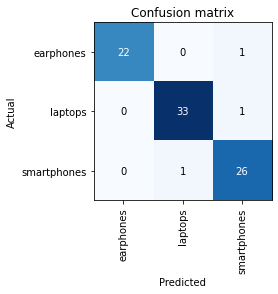

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

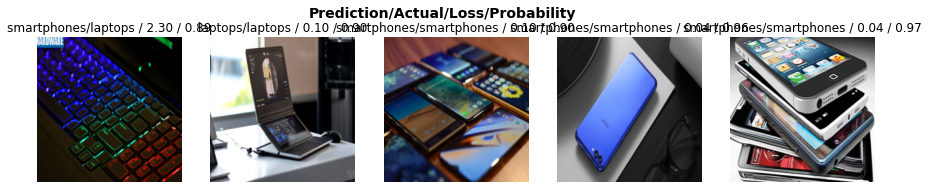

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/earphone.jpeg')

('earphones', tensor(0), tensor([9.9997e-01, 5.1626e-06, 2.0367e-05]))

In [ ]:
learn_inf.dls.vocab

(#3) ['earphones','laptops','smartphones']

##Creating an APP

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
btn_upload = SimpleNamespace(data = ['images/smartphone.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: smartphones; Probability: 1.0000')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your product!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

##Turning Your Notebook into a Real App

## transfer learning to train to find iphone Vs oneplus

In [ ]:
learn = load_learner(path/'export.pkl')

In [ ]:
results = search_images_bing(key, 'iphone 11')
ims = results.attrgot('content_url')
len(ims)


150

In [ ]:
ims[0]

'https://cdn.wccftech.com/wp-content/uploads/2019/06/iPhone-11-Cases.jpg'

In [ ]:
prod_types = 'iphone','oneplus'
path = Path('sp_products')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in prod_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
fns

(#286) [Path('sp_products/oneplus/00000047.jpg'),Path('sp_products/oneplus/00000014.jpg'),Path('sp_products/oneplus/00000015.jpg'),Path('sp_products/oneplus/00000120.png'),Path('sp_products/oneplus/00000066.jpg'),Path('sp_products/oneplus/00000099.jpg'),Path('sp_products/oneplus/00000129.jpg'),Path('sp_products/oneplus/00000077.jpg'),Path('sp_products/oneplus/00000024.jpg'),Path('sp_products/oneplus/00000083.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
sp_products = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = sp_products.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


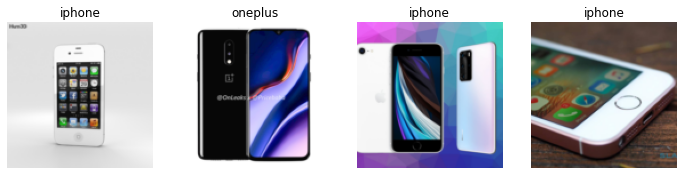

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
sp_products = sp_products.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = sp_products.dataloaders(path)

In [ ]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)


In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.461233,0.669371,0.263158,00:11


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.860072,0.518844,0.192982,00:11
1,0.732920,0.418880,0.175439,00:11
2,0.620499,0.320641,0.140351,00:11
3,0.527711,0.277781,0.122807,00:11


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


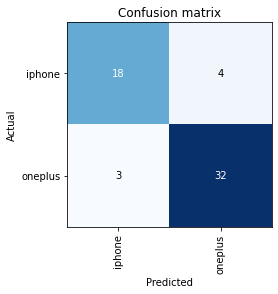

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.predict('images/ip.jpg')

('iphone', tensor(0), tensor([9.9984e-01, 1.5694e-04]))